
# Udemy Courses Analysis Project

## Project Overview

In this project, we will delve into a comprehensive analysis of a dataset containing information about Udemy courses. As an enthusiastic data analyst eager to work in the data field, you have a unique opportunity to gain valuable insights from this dataset while honing your skills in Python, SQL, Excel, and data analysis.

## Project Objective

The primary objective of this project is to extract actionable insights from the Udemy dataset. By leveraging your data analysis skills and industry expertise, we aim to achieve the following:

1.  **Gain Insights into Course Popularity:** We will explore which courses attract the most subscribers and why. This analysis will involve examining factors such as course subject, pricing, and content duration.
    
2.  **Pricing Strategies:** We will investigate Udemy's pricing strategies by analyzing the distribution of course prices. This analysis will help us understand how price affects course enrollment.
    
3.  **Subject Analysis:** We will categorize courses by subject and examine the distribution of courses within each subject. Are certain subjects more popular than others?
    
4.  **Trends and Patterns:** Identifying trends and patterns in the data will be a key focus. We will look for correlations between variables like the number of subscribers, the number of reviews, and course difficulty level.
    
5.  **Data Visualization:** Data visualization will play a crucial role in presenting our findings. We will use various charts and graphs to make the analysis results more accessible and understandable.
    
6.  **Python Code Optimization:** Throughout the project, we will ensure that our Python code adheres to the PEP-8 guidelines for code style and optimization. Clean and efficient code is essential for effective data analysis.
    
7.  **Documentation:** Detailed documentation of the code and analysis steps will be maintained, including comments in Python code. This documentation will serve as a reference for future work and collaborations.
    

## Dataset Description

The dataset consists of the following columns:

1.  `course_id`: Unique identifier for each course.
2.  `course_title`: The title or name of the course.
3.  `is_paid`: Indicates whether the course is paid (True/False).
4.  `price`: The price of the course.
5.  `num_subscribers`: The number of subscribers to the course.
6.  `num_reviews`: The number of reviews for the course.
7.  `num_lectures`: The number of lectures in the course.
8.  `level`: The difficulty level of the course (e.g., beginner, intermediate, advanced).
9.  `content_duration`: The duration of the course content.
10.  `published_timestamp`: The timestamp when the course was published.
11.  `subject`: The subject or category of the course.

## Import all required Libraries

In [2]:
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For better data  visualization
import re  # For regular expression operations
import klib as kb  # For data cleaning and visualization
from wordcloud import WordCloud  # For word cloud


#### Read the dataset with the pandas library

In [9]:
df = pd.read_csv("7. Udemy Courses.csv", encoding="UTF-8")


#### Let's Explore the dataset

In [10]:
# Print the top 5 lines of the  file.
df.head(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,1,35,3137,18,68,All Levels,Musical Instruments,90,2014,9,18,Low Price
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,1,75,1593,1,41,Intermediate Level,Musical Instruments,60,2017,4,12,Low Price
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,1,75,482,1,47,Intermediate Level,Musical Instruments,90,2017,4,26,Low Price
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,1,75,850,3,43,Intermediate Level,Musical Instruments,60,2017,2,21,Low Price
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,1,75,940,3,32,Intermediate Level,Musical Instruments,37,2017,2,21,Low Price


In [11]:
# Print the bottom 5 lines of the file.
df.tail(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,120,1566,29,36,All Levels,Web Development,240,2015,4,20,Low Price
3678,552700,Your Second Course on Piano: Two Handed Playing,1,70,1018,12,22,Beginner Level,Musical Instruments,300,2015,10,26,Low Price
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,Web Development,390,2015,11,11,Low Price
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26,Free
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,Graphic Design,90,2016,9,26,Low Price


We can observe that, in the dataset, the courses with no price is denoted by "Free". This will be changed to 0 for better analysis.

In [12]:
# Change the Free price value with 0
df["price"] = df["price"].apply(lambda x: 0 if x == "Free" else x)

df.tail(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,120,1566,29,36,All Levels,Web Development,240,2015,4,20,Low Price
3678,552700,Your Second Course on Piano: Two Handed Playing,1,70,1018,12,22,Beginner Level,Musical Instruments,300,2015,10,26,Low Price
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,Web Development,390,2015,11,11,Low Price
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26,Free
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,Graphic Design,90,2016,9,26,Low Price


Also, is_paid column is of boolean type. We will convert it to 0 and 1 for better analysis.

In [13]:
# Also, is_paid column is of boolean type. We will convert it to 0 and 1 for better analysis.
df["is_paid"] = df["is_paid"].apply(lambda x: 1 if x == True else 0)

df.tail(5)


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,120,1566,29,36,All Levels,Web Development,240,2015,4,20,Low Price
3678,552700,Your Second Course on Piano: Two Handed Playing,1,70,1018,12,22,Beginner Level,Musical Instruments,300,2015,10,26,Low Price
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,Web Development,390,2015,11,11,Low Price
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26,Free
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,Graphic Design,90,2016,9,26,Low Price


Let's convert the content_duration column to minutes for better analysis.

In [14]:
# # Convert time values to minutes and create a new column
# # As I have updated the file and save the changes in main file only, I can't run this code again. So, I have commented it. Also, I have added new file


# def convert_to_minutes(time_str):
#     hours = 0
#     minutes = 0
#     if "hour" in time_str:
#         hours_match = re.search(r"(\d+(\.\d+)?)\s*hour", time_str)
#         if hours_match:
#             hours = float(hours_match.group(1))
#     if "min" in time_str:
#         minutes_match = re.search(r"(\d+)\s*min", time_str)
#         if minutes_match:
#             minutes = int(minutes_match.group(1))
#     return int(hours * 60 + minutes)


# df["course_duration (in minutes)"] = df["content_duration"].apply(
#     convert_to_minutes)


# # Let's drop the  content_duration column
# df.drop(columns=["content_duration"], inplace=True)
# df.head(3)

As we can observe, the published_timestamp column contains the date and time of publishing the course. We will extract the year, month and day from this column for better analysis.

In [ ]:
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])
df["published_year"] = df["published_timestamp"].dt.year
df["published_month"] = df["published_timestamp"].dt.month
df["published_day"] = df["published_timestamp"].dt.day
df.drop(columns=["published_timestamp"], inplace=True)
df.tail(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,40,723,130,37,All Levels,Web Development,390,2015,11,11
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26
3681,964478,Zombie Apocalypse Photoshop Actions,1,50,12,1,15,All Levels,Graphic Design,90,2016,9,26


In [ ]:
# Print the number of rows and columns in the data frame.
df.shape


(3682, 13)

So we have 3682 rows and 11 columns in our dataset. Let's check the data types of each column.

In [ ]:
# Check the data types of the columns.
df.dtypes


course_id                        int64
course_title                    object
is_paid                          int64
price                           object
num_subscribers                  int64
num_reviews                      int64
num_lectures                     int64
level                           object
subject                         object
course_duration (in minutes)     int64
published_year                   int32
published_month                  int32
published_day                    int32
dtype: object

We can observe that, `price ` column is of object type. We will convert it to *int* type for enabling easier pricing strategy exploration.

In [ ]:
# Change the data type of price column to int
df["price"] = df["price"].astype("int")


In [ ]:
# Let's remove the course_id column as it is not required for analysis.
df.drop(columns=["course_id"], inplace=True)

The price in the dataset is in dollars. Let's convert it to Indian Rupees for better understanding.

In [ ]:
# Let's convert the price from dollars to Indian rupees.
# At the time of writing this, one Dollar is worth 82.69 Indian Rupee.
def convert_to_rupees(price):
    return int(price * 82.69)


# Save the converted price to our data frame.
# Convert to Indian Rupees by multiplying with 82.69
df["price"] = df["price"].apply(convert_to_rupees)
# df["price"] = df["price"] * 82.69                         # Another way to convert to Indian Rupees
# df['price'] = df['price'] / 82.69                         # Convert to Indian Rupees
df

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,1,2894,3137,18,68,All Levels,Musical Instruments,90,2014,9,18,Low Price
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,1,6201,1593,1,41,Intermediate Level,Musical Instruments,60,2017,4,12,Low Price
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,1,6201,482,1,47,Intermediate Level,Musical Instruments,90,2017,4,26,Low Price
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,1,6201,850,3,43,Intermediate Level,Musical Instruments,60,2017,2,21,Low Price
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,1,6201,940,3,32,Intermediate Level,Musical Instruments,37,2017,2,21,Low Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,9922,1566,29,36,All Levels,Web Development,240,2015,4,20,Low Price
3678,552700,Your Second Course on Piano: Two Handed Playing,1,5788,1018,12,22,Beginner Level,Musical Instruments,300,2015,10,26,Low Price
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,3307,723,130,37,All Levels,Web Development,390,2015,11,11,Low Price
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26,Free


Let's create a category column for each course based on its price. We will categorize the courses as follows: <br />
If the price is less than 2500, it will be categorized as "Low Price".<br />
If the price is between 2500 and 5000, it will be categorized as "Medium Price".<br />
If the price is greater than 5000, it will be categorized as "High Price".

In [ ]:
# Let's create a category column for each course based on its price.


def categorize_price(price):
    if price == 0:
        return "Free"
    elif price > 0 and price < 2500:
        return "Low Price"
    elif price >= 2500 and price < 5000:
        return "Medium Price"
    else:
        return "High Price"


df["price_category"] = df["price"].apply(categorize_price)
df

# # Save the data frame to the csv file.
# df.to_csv("7. Udemy Courses.csv", index=False)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,1,2894,3137,18,68,All Levels,Musical Instruments,90,2014,9,18,Medium Price
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,1,6201,1593,1,41,Intermediate Level,Musical Instruments,60,2017,4,12,High Price
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,1,6201,482,1,47,Intermediate Level,Musical Instruments,90,2017,4,26,High Price
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,1,6201,850,3,43,Intermediate Level,Musical Instruments,60,2017,2,21,High Price
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,1,6201,940,3,32,Intermediate Level,Musical Instruments,37,2017,2,21,High Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,328960,Your Own Site in 45 Min: The Complete Wordpres...,1,9922,1566,29,36,All Levels,Web Development,240,2015,4,20,High Price
3678,552700,Your Second Course on Piano: Two Handed Playing,1,5788,1018,12,22,Beginner Level,Musical Instruments,300,2015,10,26,High Price
3679,631754,Zend Framework 2: Learn the PHP framework ZF2 ...,1,3307,723,130,37,All Levels,Web Development,390,2015,11,11,Medium Price
3680,1225194,Zoho Books Gestion Financière d'Entreprise pas...,0,0,229,0,33,All Levels,Business Finance,120,2017,5,26,Free


Check for null values in the data set

In [ ]:
df.isnull().sum()

course_title                    0
is_paid                         0
price                           0
num_subscribers                 0
num_reviews                     0
num_lectures                    0
level                           0
subject                         0
course_duration (in minutes)    0
published_year                  0
published_month                 0
published_day                   0
price_category                  0
dtype: int64

So, there are no null values in our dataset which is kind of a good thing. :) <br />
Let's proceed further

#### Let's have a look at the statistical summary of the dataset

In [ ]:
df.describe()
# describe() function gives us the statistical summary of the numerical columns in the data frame.

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,course_duration (in minutes),published_year,published_month,published_day
count,3.682000e+03,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000,3682.000000
mean,6.766121e+05,0.915807,5457.936176,3194.230310,156.093156,40.065182,245.404128,2015.432917,6.164041,15.840576
std,3.436355e+05,0.277715,5042.878426,9499.378361,934.957204,50.373299,363.123236,1.185800,3.378702,8.782027
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000
25%,4.078430e+05,1.000000,1653.000000,110.250000,4.000000,15.000000,60.000000,2015.000000,3.000000,8.000000
50%,6.885580e+05,1.000000,3721.000000,911.500000,18.000000,25.000000,120.000000,2016.000000,6.000000,16.000000
75%,9.617515e+05,1.000000,7855.000000,2540.250000,67.000000,45.000000,270.000000,2016.000000,9.000000,23.000000
max,1.282064e+06,1.000000,16538.000000,268923.000000,27445.000000,779.000000,4710.000000,2017.000000,12.000000,31.000000


#### Courses with Maximum and Minimum number of subscribers 

In [ ]:
# Let's find out course with maximum number of subscribers and print the details

max_subscribers = df["num_subscribers"].max()
df[df["num_subscribers"] == max_subscribers]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
2230,41295,Learn HTML5 Programming From Scratch,0,0,268923,8629,45,All Levels,Web Development,630,2013,2,14,Free


**Course with the Highest Subscribers:**
The course titled "Learn HTML5 Programming From Scratch" stands out with a remarkable 268,923 subscribers. This free course in the field of Web Development has garnered significant attention and engagement.


In [ ]:
# # Let's find out course with minimum number of students and print the details.

min_subscribers = df["num_subscribers"].min()
df[df["num_subscribers"] == min_subscribers]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
37,1234656,4 Week Rhythm Mastery,1,1653,0,0,28,Beginner Level,Musical Instruments,150,2017,7,5,Low Price
44,1231958,60 Minutes to Fundamental Accounting Skills,1,6201,0,0,9,Beginner Level,Business Finance,150,2017,6,28,High Price
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,1,1653,0,0,5,Beginner Level,Musical Instruments,31,2017,7,6,Low Price
98,1219820,Accounting - The 6 most important rules you mu...,1,1653,0,0,9,All Levels,Business Finance,60,2017,5,25,Low Price
185,872262,Adobe Photoshop pentru Social Media,1,1653,0,0,12,Beginner Level,Graphic Design,34,2016,6,8,Low Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,1214670,Tune that Sour Note on Your Piano,1,1653,0,0,6,All Levels,Musical Instruments,33,2017,6,20,Low Price
3512,1251654,Understand Core Finance Principles in 60 Minutes,1,6201,0,0,13,Beginner Level,Business Finance,150,2017,6,29,High Price
3515,1035638,Understanding Financial Statements,1,2067,0,0,10,All Levels,Business Finance,60,2016,12,15,Low Price
3516,1035638,Understanding Financial Statements,1,2067,0,0,10,All Levels,Business Finance,60,2016,12,15,Low Price


So we can see that, there are 70 courses with 0 subscribers, that's a huge number. Let's see the subjects of these courses.

In [ ]:
# # Let's count the category of course with minimum subscribers.
df[df["num_subscribers"] == min_subscribers]["subject"].value_counts()


subject
Business Finance       40
Graphic Design         19
Musical Instruments    11
Name: count, dtype: int64

Among the subjects analyzed, `Business Finance`, `Graphic Design` and `Musical Instruments` have the highest prevalence of courses with zero subscribers. Notably, `Web Development` stands out as the subject without any courses featuring zero subscribers

#### Courses with Maximum and Minimum number of reviews

In [ ]:
# Let's find out course with maximum number of reviews and print the details

max_reviews = df["num_reviews"].max()
df[df["num_reviews"] == max_reviews]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
3385,625204,The Web Developer Bootcamp,1,16538,121584,27445,342,All Levels,Web Development,2580,2015,11,2,High Price


**Course with the Highest Reviews:**
"The Web Developer Bootcamp" takes the lead with an impressive 27,445 reviews, making it a highly reviewed course in the Web Development category. Despite being a high-priced course, it has garnered significant attention and feedback from learners.


In [ ]:
# Let's find out course with minimum number of reviews and print the details.

min_reviews = df["num_reviews"].min()
df[df["num_reviews"] == min_reviews]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
20,1165268,15 Motion Graphic Elements in After Effect (S...,1,2480,8,0,20,Intermediate Level,Graphic Design,180,2017,4,11,Low Price
29,1089610,3 Little Pigs: A Multiple Timeframe Forex Trad...,1,1653,18,0,6,All Levels,Business Finance,90,2017,2,24,Low Price
37,1234656,4 Week Rhythm Mastery,1,1653,0,0,28,Beginner Level,Musical Instruments,150,2017,7,5,Low Price
43,166842,6. Annuities Due and Deferred,1,1653,170,0,16,All Levels,Business Finance,90,2014,2,24,Low Price
44,1231958,60 Minutes to Fundamental Accounting Skills,1,6201,0,0,9,Beginner Level,Business Finance,150,2017,6,28,High Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,1153854,"Working Capital assessment for bankers, credit...",1,1653,4,0,29,Beginner Level,Business Finance,420,2017,4,6,Low Price
3645,1271430,Workshop on Banking Credit Analysis Process,1,8269,0,0,7,All Levels,Business Finance,90,2017,6,28,High Price
3650,849632,Write a Successful Business Grant Proposal,1,1653,6,0,23,Beginner Level,Business Finance,150,2016,7,10,Low Price
3666,969170,XSD :basics for beginners,1,2894,755,0,7,All Levels,Web Development,42,2016,9,27,Medium Price


In [ ]:
# Let's find the courses with minimum number of reviews but having subscribers > 50

df[(df["num_reviews"] == min_reviews) & (df["num_subscribers"] > 1000)]


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,subject,course_duration (in minutes),published_year,published_month,published_day,price_category
1152,810550,Effective Personal Website Building and Hosting,1,1653,4259,0,11,All Levels,Web Development,60,2016,4,11,Low Price
1568,727510,How To Become An Etsy Wholesale Seller,1,8269,1013,0,25,Beginner Level,Graphic Design,150,2016,3,29,High Price
3197,442114,Take Control By Learning The Stock Market Now,1,2480,1440,0,21,Beginner Level,Business Finance,60,2015,3,10,Low Price
3529,615602,Valuation of Goodwill for CA / CFA / CMA Exams,1,1653,1509,0,9,All Levels,Business Finance,43,2015,9,23,Low Price



Courses with 0 review counts but over 1000 subscribers span diverse subjects, demonstrating that learner interest isn't solely influenced by reviews. Varied pricing and skill levels show that value and relevance play key roles in attracting subscribers.

In [ ]:
# Let's Find the Highest-Priced Course and find out details like course title, price, subscribers, reviews and subject

max_price = df["price"].max()
df[df["price"] == max_price][
    ["course_title", "price", "num_subscribers", "num_reviews", "subject"]
]

,course_title,price,num_subscribers,num_reviews,subject
7,* An Integrated Approach to the Fundamentals o...,16538,134,14,Business Finance
9,[Value Investing] Where White People Keep Thei...,16538,2715,70,Business Finance
10,1 - Concepts of Statistics For Beginners Step ...,16538,273,4,Business Finance
12,1 Hour HTML,16538,16212,514,Web Development
13,1 Hour JavaScript,16538,22999,602,Web Development
...,...,...,...,...,...
3636,WordPress Tips and Tricks,16538,1117,10,Web Development
3637,Wordpress Tutorial,16538,2311,8,Web Development
3640,WordPress: Create an Amazing Website With Ease,16538,1109,13,Web Development
3649,WP Plugin Development - Build your own plugin!,16538,5439,22,Web Development


In [ ]:
# Convert the number of subscribers to integer
df["num_subscribers"] = df["num_subscribers"].astype("int")

# Calculate the average number of subscribers for high-priced courses (Price >= 5000)
mean_subscribers_high_price = df[df["price"] >= 5000]["num_subscribers"].mean()

# Calculate the average number of subscribers for medium-priced courses (Price >= 2500 and < 5000)
mean_subscribers_medium_price = df[(df["price"] >= 2500) & (df["price"] < 5000)][
    "num_subscribers"
].mean()

# Calculate the average number of subscribers for low-priced courses (Price >= 0 and < 2500)
mean_subscribers_low_price = df[(df["price"] >= 0) & (df["price"] < 2500)][
    "num_subscribers"
].mean()

# Calculate the average number of subscribers for free courses (Price == 0)
mean_subscribers_free = df[df["price"] == 0]["num_subscribers"].mean()

# Display the results
print(
    f"High-Priced Courses Average Subscribers: {mean_subscribers_high_price:.0f}")
print(
    f"Medium-Priced Courses Average Subscribers: {mean_subscribers_medium_price:.0f}")
print(
    f"Low-Priced Courses Average Subscribers: {mean_subscribers_low_price:.0f}")
print(
    f"Free Courses Average Subscribers: {mean_subscribers_free:.0f}")

High-Priced Courses Average Subscribers: 4140
Medium-Priced Courses Average Subscribers: 1346
Low-Priced Courses Average Subscribers: 3658
Free Courses Average Subscribers: 11534


High-priced courses (Avg. Subscribers: 4140) maintain demand, medium-priced courses (Avg. Subscribers: 1345) show moderate engagement, low-priced courses (Avg. Subscribers: 3658) attract substantial interest, and free courses (Avg. Subscribers: 11533) garner high popularity, highlighting pricing's pivotal role in attracting subscribers.


In [ ]:
# Let's categorize the courses based on the subject to find out which subject has the maximum number of courses with highest price

df[df["price"] == max_price]["subject"].value_counts()

subject
Business Finance       128
Web Development        113
Graphic Design          35
Musical Instruments     19
Name: count, dtype: int64

We can observe that `Business Finance` has the maximum number of courses (128 courses) in high price category followed by `Web Development` with 113 courses.

In [ ]:
# Define price categories
def categorize_price(price):
    if price == 0:
        return "Free"
    elif price > 0 and price < 2500:
        return "Low Price"
    elif price >= 2500 and price < 5000:
        return "Medium Price"
    elif price >= 5000:
        return "High Price"


# Apply the categorization to create a new 'price_category' column
df["price_category"] = df["price"].apply(categorize_price)

# Calculate the average number of subscribers for each price category
average_subscribers_by_category = df.groupby(
    "price_category")["num_subscribers"].mean()

# Print the results
print("Average number of subscribers by price category:")
average_subscribers_by_category.to_frame().T.round(0).style.format("{:,.0f}")

Average number of subscribers by price category:


price_category,Free,High Price,Low Price,Medium Price
num_subscribers,"11,534","4,140","1,543","1,346"


#### Co-relation between the columns

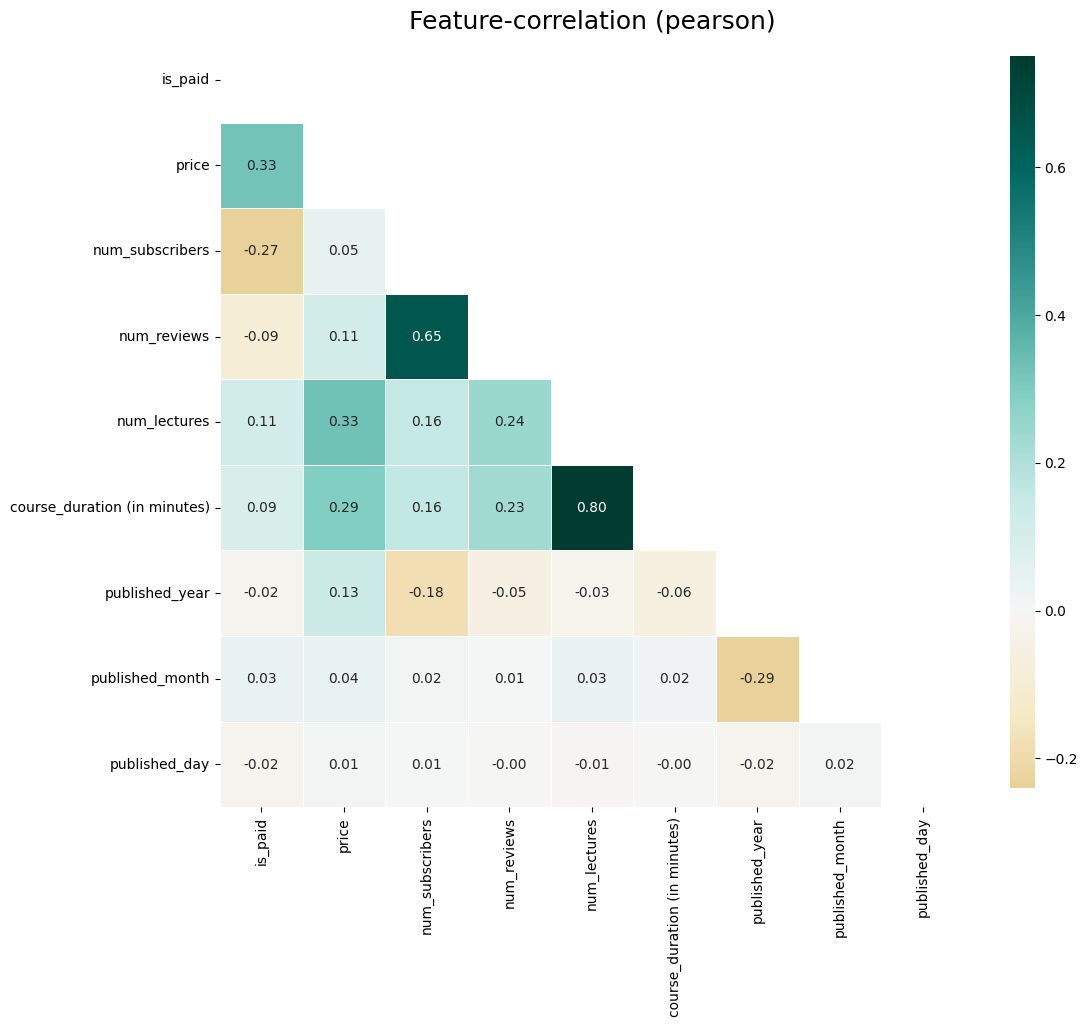

In [ ]:
# Let's plot correlation matrix to see the correlation between the variables using klip library function corr_plot().
kb.corr_plot(df, annot=True)

# Remove the object type columns from the data frame
df = df.select_dtypes(exclude="object")

#### Insights from Correlations

Strong correlation (0.80) between 'num_lectures' and 'course_duration' suggests lecture count affects content duration. <br />

Moderate correlation (0.65) between 'num_reviews' and 'num_subscribers' indicates more subscribers lead to more reviews. <br />

Weak correlations (0.05 and 0.11) suggest minimal influence of 'price' on 'num_subscribers' and 'num_reviews.'


#### Course Subjects Distribution

In [ ]:
df.dtypes

is_paid                         int64
price                           int64
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
course_duration (in minutes)    int64
published_year                  int32
published_month                 int32
published_day                   int32
dtype: object

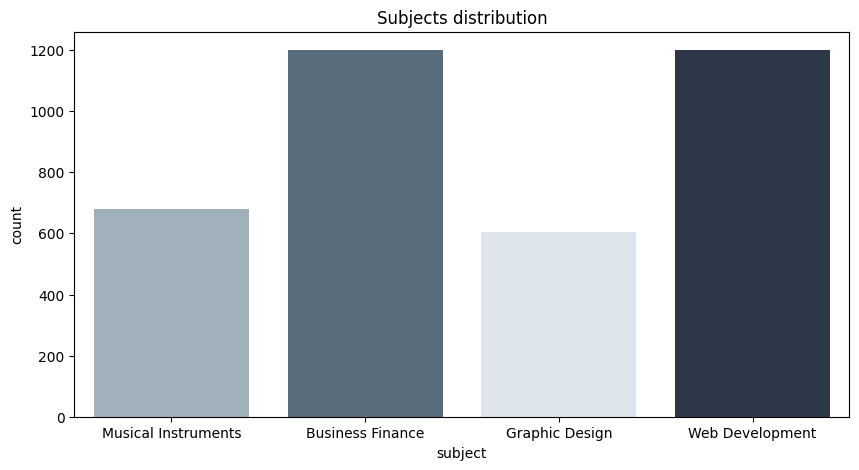

In [ ]:
# Read the data frame again
df = pd.read_csv("7. Udemy Courses.csv", encoding="UTF-8")

# Define a custom color palette
custom_palette = ["#9DB2BF", "#526D82", "#DDE6ED", "#27374D"]
# custom_palette = ["#0E8388", "#2E4F4F", "#CBE4DE", "#2C3333"]

# Let's see the subjects distribution in the dataset
plt.figure(figsize=(10, 5))
sns.countplot(x="subject", data=df, palette=custom_palette)
plt.title("Subjects distribution")
plt.show()


We can observe that, `Business Finance` and `Web Development` has ~1200 courses, followed by `Musical Instruments` with ~680 courses. `Graphic Design` has the least number of courses with ~600 courses.

#### Price Distribution

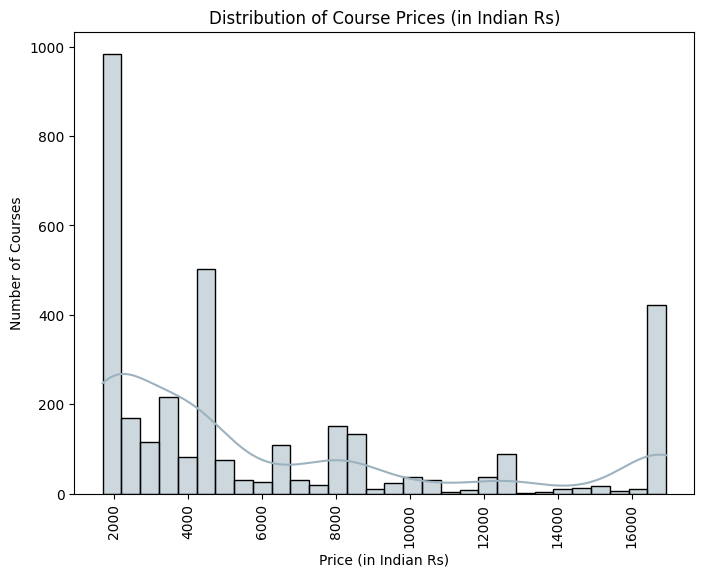

In [ ]:
# Assuming a conversion rate of 1 USD = 84.69 INR
conversion_rate = 84.69

# Convert "Free" prices to 0, then calculate the prices in INR
df["price_inr"] = (
    df["price"].replace("Free", 0).str.replace(
        "$", "").astype(float) * conversion_rate
)

# Visualization of course price distribution in Indian Rupees
plt.figure(figsize=(8, 6))
sns.histplot(df["price_inr"], bins=30, kde=True, color="#9DB2BF")
plt.title("Distribution of Course Prices (in Indian Rs)")
plt.xlabel("Price (in Indian Rs)")
plt.ylabel("Number of Courses")
plt.xticks(rotation=90)
plt.show()

So we can observe that, ~1000 courses are under Rs. 2000 which are quite affordable. ~500 courses are between Rs. 2000 and Rs. 4000. ~800 courses are between Rs. 4000 and Rs. 6000. ~ >1000 courses are above Rs. 6000 which are quite expensive.

#### Published Year Trends

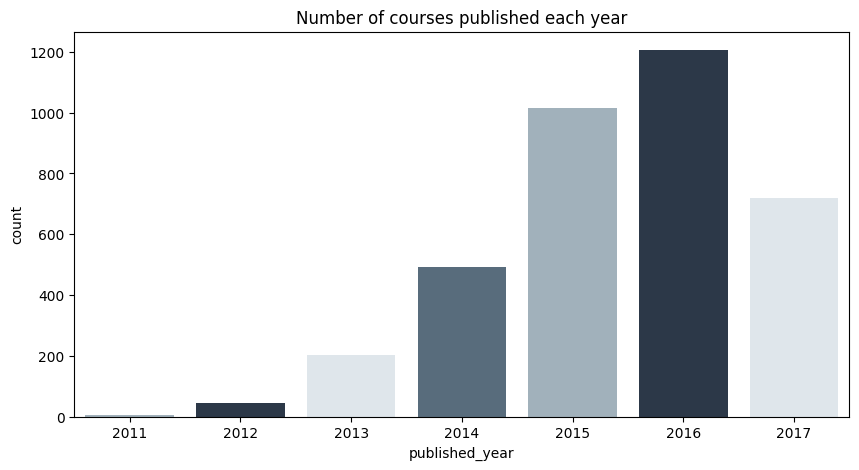

In [ ]:
# Let's create a palette of colors
custom_palette = ["#9DB2BF", "#27374D", "#DDE6ED", "#526D82"]


# Let's see the number of courses published each year
plt.figure(figsize=(10, 5))
sns.countplot(x="published_year", data=df, palette=custom_palette)
plt.title("Number of courses published each year")
plt.show()

We can observe that till 2016, there was a steady increase in the number of courses published. But in 2017, there was a slight decrease in the number of courses published.

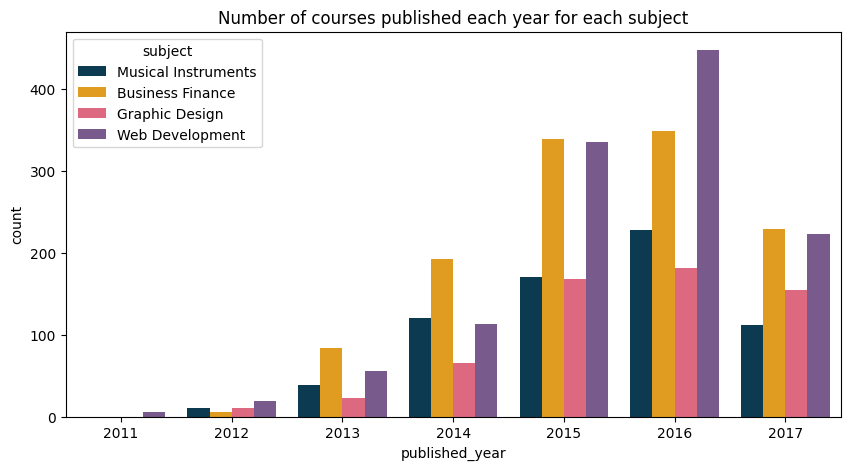

In [ ]:
# Let's create a palette of colors
custom_palette = ["#003f5c", "#ffa600", "#ef5675", "#7a5195"]

# Let's see the number of courses published each year for each subject
plt.figure(figsize=(10, 5))
sns.countplot(x="published_year", hue="subject", data=df, palette=custom_palette)
plt.title("Number of courses published each year for each subject")
plt.show()

`Business Finance` consistently leads in the number of courses offered since 2013. However, a significant surge in `Web Development` courses started in 2015. Meanwhile, `Musical Instruments` and `Graphic Design` courses have exhibited a consistent, gradual increase in offerings since 2013.

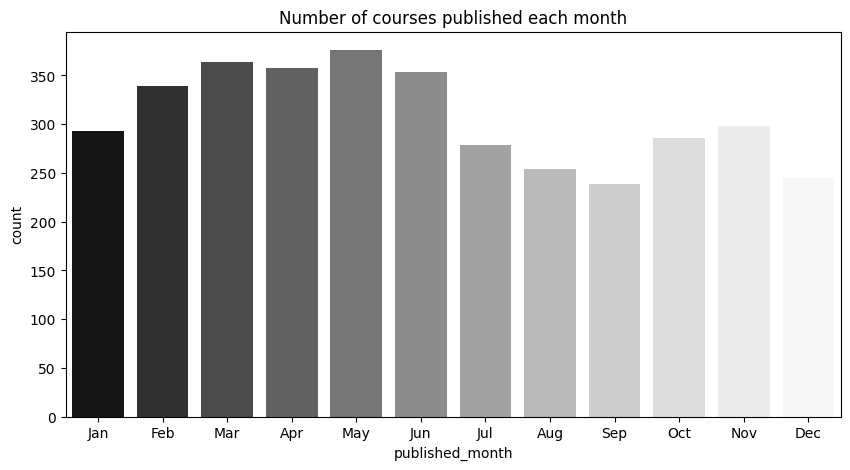

In [ ]:
# Let's see the number of courses published each month
plt.figure(figsize=(10, 5))
sns.countplot(x="published_month", data=df, palette="Greys_r")
plt.title("Number of courses published each month")

# Set the x-axis tick labels to month names
plt.xticks(
    range(12),
    [
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
)

plt.show()
# Explanation: This line plot illustrates how course publications vary by month, revealing monthly trends.


It is evident that `May` is the most popular month for publishing courses, followed by `March` and `April`. `September` is the least popular month for publishing courses. <br />
It might be because, `May` is the month when most of the students complete their exams and start looking for courses. So it is the best time to publish courses. <br />

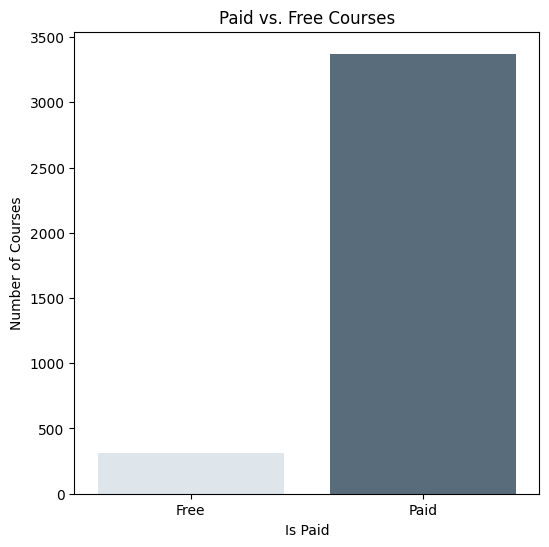

In [ ]:
# Let's create a palette of colors
custom_palette = ["#DDE6ED", "#526D82"]

# Paid vs. Free Courses
plt.figure(figsize=(6, 6))
sns.countplot(x="is_paid", data=df, palette=custom_palette)
plt.title("Paid vs. Free Courses")
plt.xlabel("Is Paid")
plt.ylabel("Number of Courses")
plt.xticks(ticks=[0, 1], labels=["Free", "Paid"])
plt.show()


We can observe that, `Paid` course category has ~ >3000 courses and `Free` course category has ~ <500 courses.

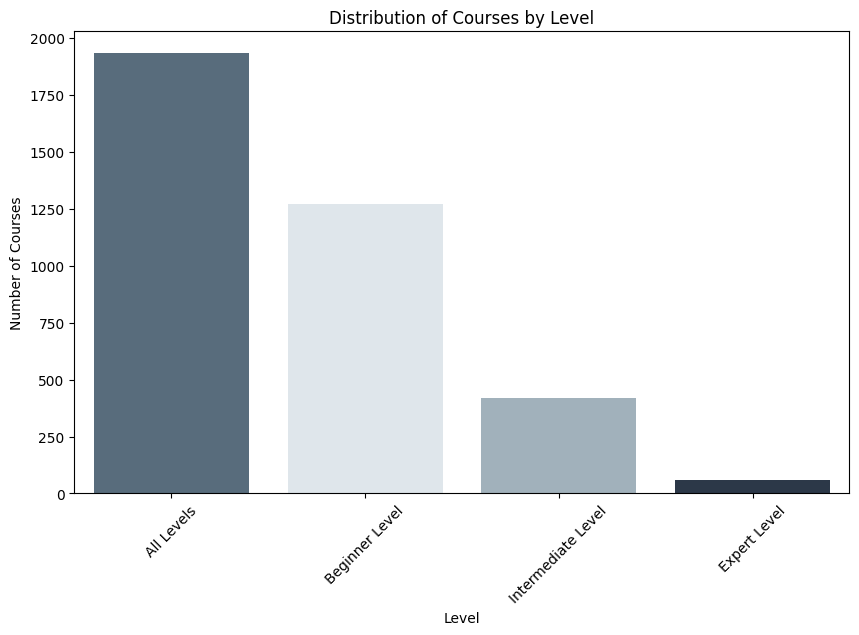

In [ ]:
# Let's create a palette of colors
custom_palette = ["#526D82", "#DDE6ED", "#9DB2BF", "#27374D"]

# Course Level Distribution
level_counts = df["level"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=level_counts.index, y=level_counts.values,
            palette=custom_palette)
plt.title("Distribution of Courses by Level")
plt.xlabel("Level")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45)
plt.show()

So, `All Levels` course category has highest number of courses followed by `Beginner Level` ,`Intermediate Level` and  `Expert Level` course categories.

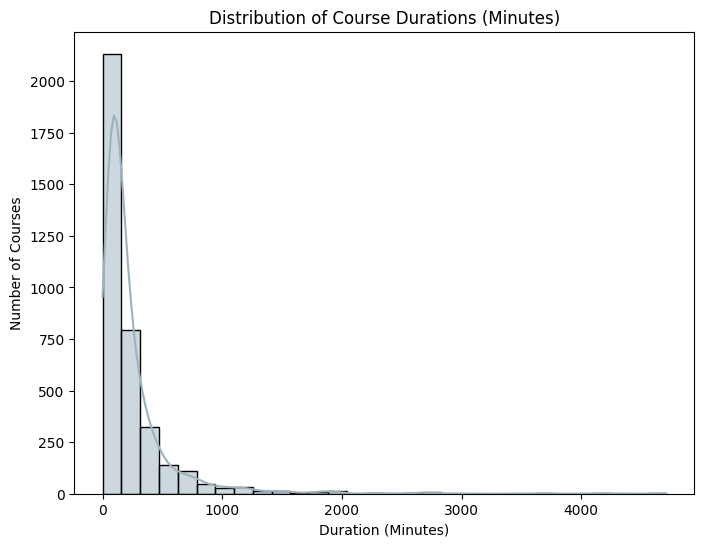

In [ ]:
# Analysis 10: Course Duration Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["course_duration (in minutes)"],
             bins=30, kde=True, color="#9DB2BF")
plt.title("Distribution of Course Durations (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Courses")
plt.show()
# Explanation: This analysis visualizes the distribution of course durations in minutes, helping you understand content length.

So, most of the courses are under 1000 minutes which is ~  16 hours and 40 minutes long, shows that most of the courses are short and crisp.<br />
We also have some outliers in the data, which are courses with more than 4000 minutes ( ~66 hours and 40 minutes ) of content duration which is quite long. These courses might be having a lot of content or might be having a lot of videos. <br />

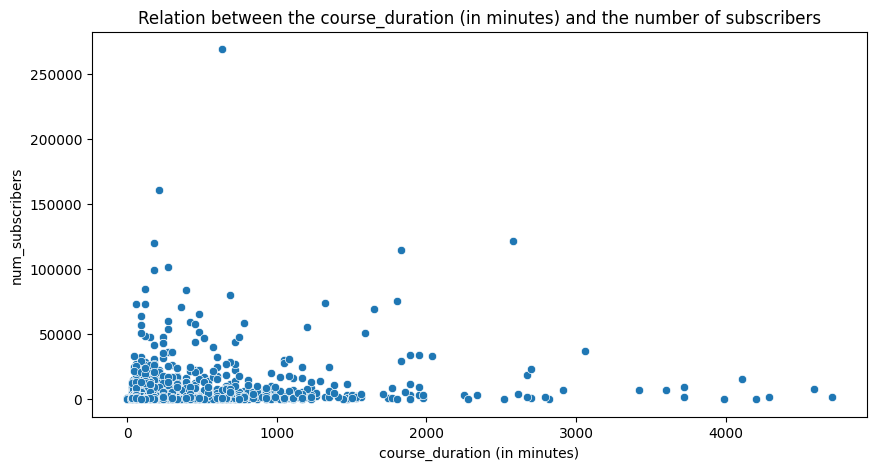

In [ ]:
# Let's check if there is any relation between the course_duration (in minutes) and the number of subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x="course_duration (in minutes)", y="num_subscribers", data=df)
plt.title(
    "Relation between the course_duration (in minutes) and the number of subscribers"
)
plt.show()

`Course Title` column contains the name of the course. Let's see the most popular words in the course titles.

`Course Duration` and `Number of Subscribers` are positively correlated. <br />
But we can also observe that, outliers in `Course Duration` have less subscribers. Whereas, outliers in `Number of Subscribers` has course duration of < 1000 minutes. <br />
**This shows that, courses with less duration have more subscribers**. <br />

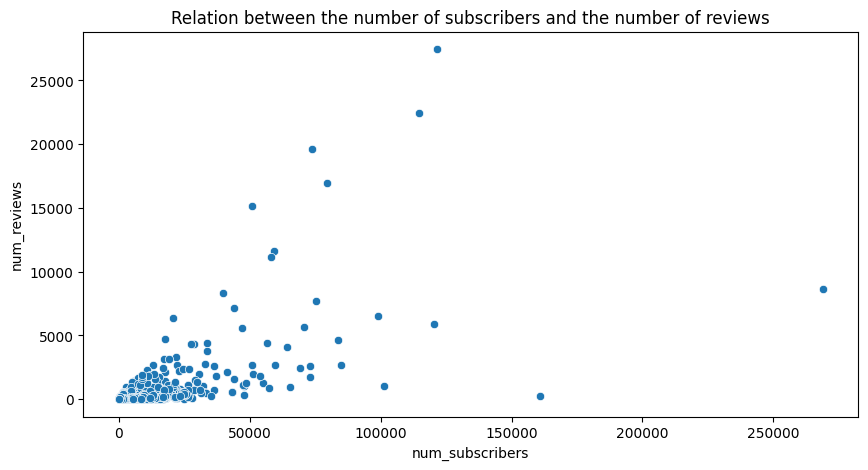

In [ ]:
# Let's check if there is any relation between the number of subscribers and the number of reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x="num_subscribers", y="num_reviews", data=df)
plt.title("Relation between the number of subscribers and the number of reviews")
plt.show()


`Number of Subscribers` and `Number of Reviews` are positively correlated. <br />
But we can also observe that, outliers in `Number of Subscribers` have less reviews. Whereas, outliers in `Number of Reviews` has more subscribers. <br />
**This shows that, number of subscribers and number of reviews are not directly proportional**. <br />

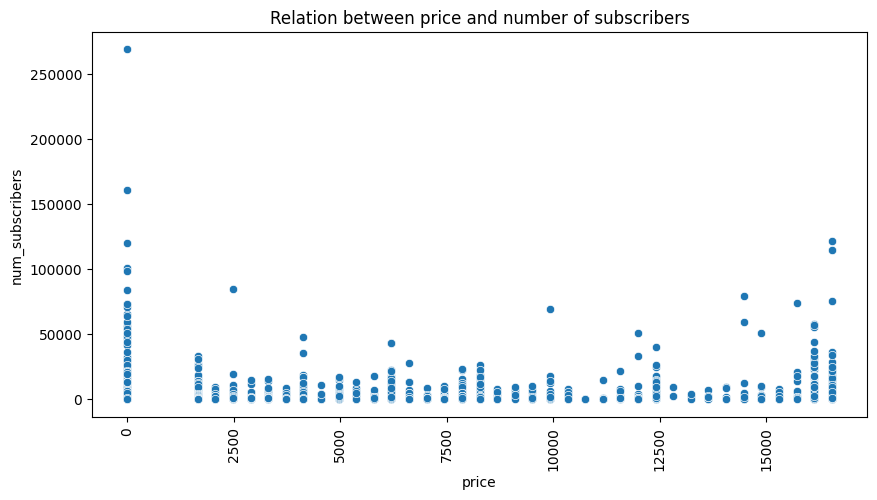

In [ ]:
# Let's check if there is any co-relation between price and number of subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x="price", y="num_subscribers", data=df)
plt.title("Relation between price and number of subscribers")

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


We can observe that, courses with `0` cost or `Free` courses have more subscribers, even have some outliers. <br />
Also, courses around > Rs. 10,000, they have subscribers less than 150000. <br />
But, it's interesting to see that, courses with price > Rs. 15000 have significantly more subscribers in `High Price` range. <br />
**This shows that, `Price` dosen't necessary affect the number of subscribers**. <br />

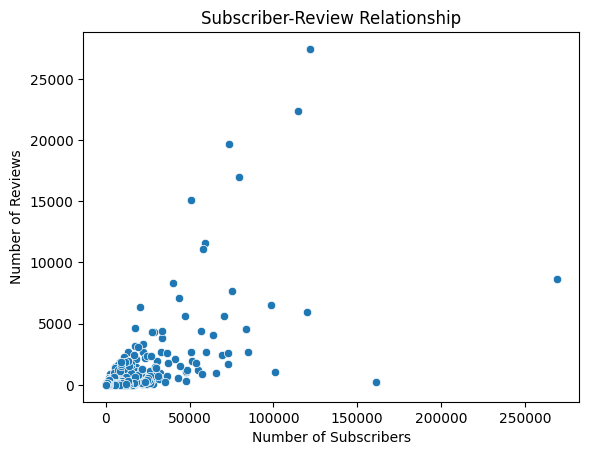

In [ ]:
sns.scatterplot(x="num_subscribers", y="num_reviews", data=df)
plt.title("Subscriber-Review Relationship")
plt.xlabel("Number of Subscribers")
plt.ylabel("Number of Reviews")
plt.show()

#### Let's create a word cloud for course titles

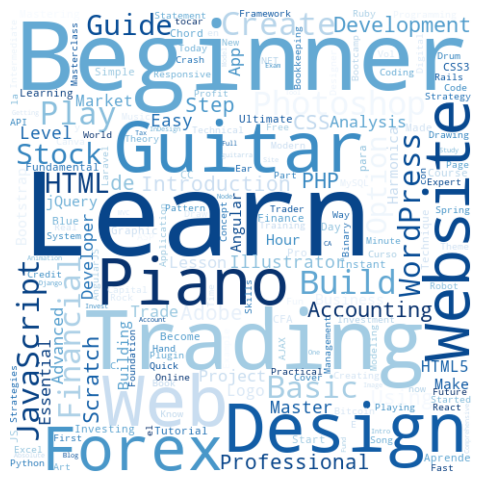

In [ ]:
# To check the time taken to execute the code
# %%time

# Define a function to clean course titles by removing stopwords and special characters
def clean_course_title(title):
    # Define a list of stopwords to be removed
    stopwords = ["to", "the", "and", "in", "for", "a", "-", "course", "complete"]
    # Tokenize the title and remove stopwords
    cleaned_title = ' '.join([word for word in title.split() if word.lower() not in stopwords])
    return cleaned_title

# Clean course titles and create a new column for cleaned titles
df["cleaned_course_title"] = df["course_title"].apply(clean_course_title)

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(
    width=480,
    height=480,
    margin=0,
    background_color="white",
    colormap="Blues",
    collocations=False,  # Disable collocation detection
).generate(' '.join(df["cleaned_course_title"]))  # Generate word cloud from cleaned titles

# Display the generated word cloud image
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


We can see that, `Learn` and `Beginner` are the most common words in the course titles, followed by `Trading` , `Guitar` , `Web` and `Piano`. <br />